In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
from sympy import Matrix, symbols, solve
from scipy.spatial.transform import Rotation
from mpl_toolkits.mplot3d import Axes3D

# Convergent Part

In [2]:
#last point(point9):
x1 = 0
r_star = 0.455/2              #meter

#first point(point1):
r1 = 2*r_star                 #the radious of the nozzle at the inlet 
l_con = 0.85                  #the length of convergent part of the nozzle
x_star = l_con

x = np.linspace(x1, x_star, 30)
y = np.cos(np.pi*x/l_con)*r_star/2+3/2*r_star
coefs = np.polynomial.polynomial.polyfit(x, y, 3)
ffit = np.poly1d(coefs[::-1])
y_new = ffit(x)
y_new[0], y_new[-1] = r1, r_star

Text(0, 0.5, 'y')

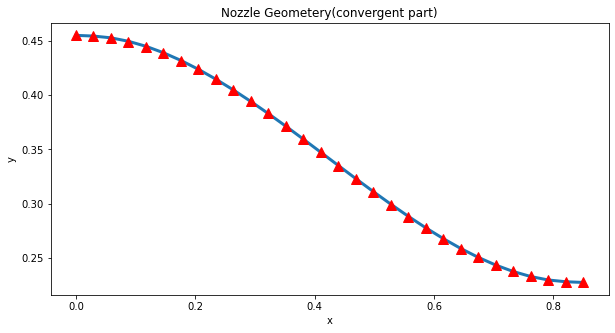

In [3]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y_new, linestyle = "solid", linewidth=3)
plt.plot(x, y, marker= "^", linestyle='', markersize=10, color='red')
plt.title('Nozzle Geometery(convergent part)')
plt.xlabel('x')
plt.ylabel('y')

In [4]:
x_con = x
y_con = y_new

# Divergent Part

In [5]:
l_div = 2.52                      #meter
x_m = 0.4*l_div                  #turning point
r_e = 0.9025                      #meter
a1 = 0.6/(2*x_m)

a2, b2, c2, d2 = symbols('a2 b2 c2 d2')
X = Matrix([a2, b2, c2, d2])
B = Matrix([r_e, 0, a1*x_m**2+r_star, 2*a1*x_m])
M = Matrix([[l_div**3, l_div**2, l_div, 1], [3*l_div**2, 2*l_div, 1, 0], [x_m**3, x_m**2, x_m, 1], [3*x_m**2, 2*x_m, 1, 0]])

dic = solve(M * X - B, [a2, b2, c2, d2])
a, b, c, d = dic[a2], dic[b2], dic[c2], dic[d2]

x_div1 = np.linspace(0, x_m, 30)
y_div1 = a1*x_div1**2+r_star
y_div1[0] = r_star

x_div2 = np.linspace(x_m, l_div, 30)
y_div2 = a*x_div2**3+b*x_div2**2+c*x_div2+d
y_div2[0], y_div2[-1] = y_div1[-1], r_e

x_div = np.array(list(x_div1)+list(x_div2[1:]))
y_div = np.array(list(y_div1)+list(y_div2[1:]))

Text(0, 0.5, 'y')

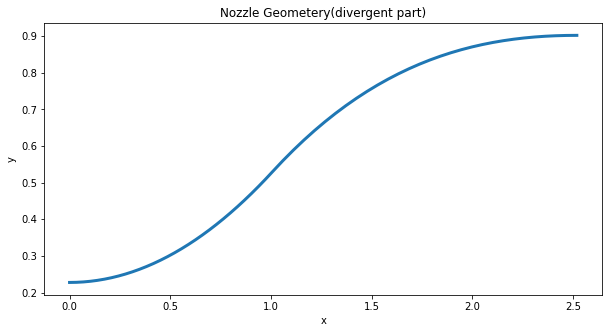

In [6]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x_div, y_div, linestyle = "solid", linewidth=3)
plt.title('Nozzle Geometery(divergent part)')
plt.xlabel('x')
plt.ylabel('y')

# Con-div Nozzle

## 2D curve

In [7]:
x_nozzle = np.array(list(x_con)+list(x_div[1:]+l_con))
y_nozzle = np.array(list(y_con)+list(y_div[1:]))

Text(0, 0.5, 'y')

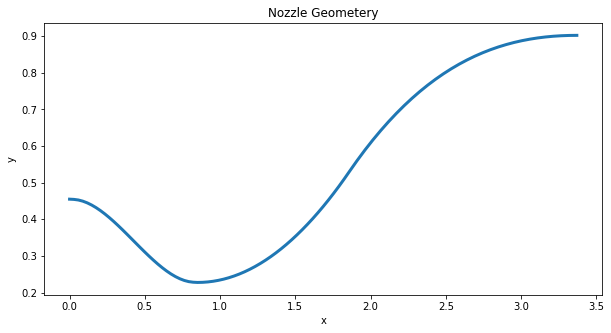

In [8]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x_nozzle, y_nozzle, linestyle = "solid", linewidth=3)
plt.title('Nozzle Geometery')
plt.xlabel('x')
plt.ylabel('y')

## 3D shape

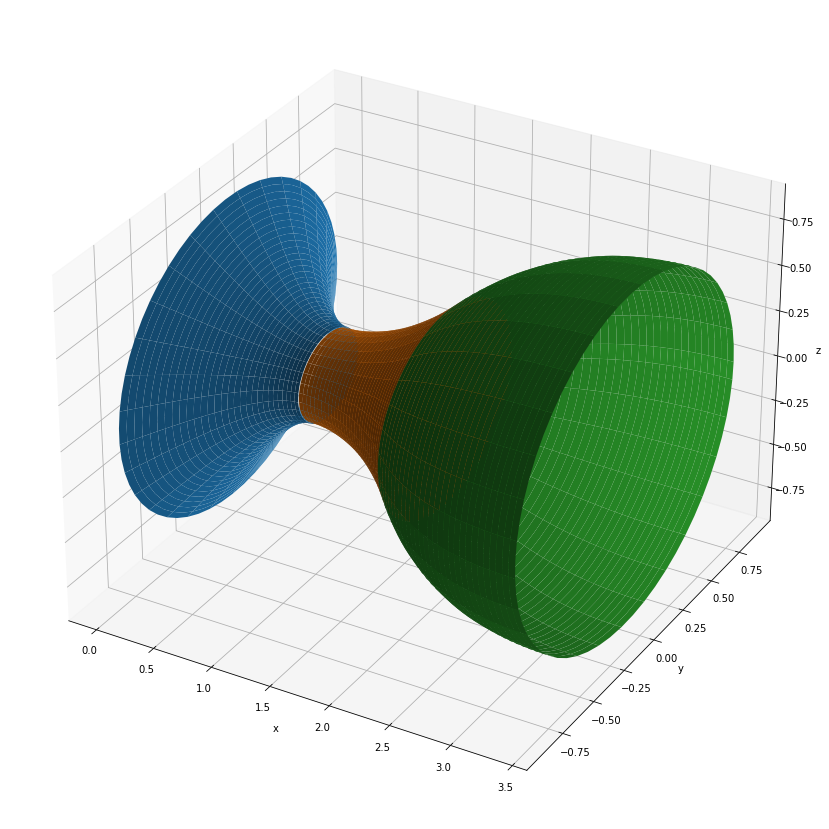

In [9]:
np.seterr(divide='ignore', invalid='ignore')

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

x = x_con
v = np.linspace(0, 2*np.pi, 60)
X, V = np.meshgrid(x, v)

Y = (0.45441948*X**3+0.03093389*X**2-1.048994*X+0.82274055)* np.cos(V) 
Z = (0.45441948*X**3+0.03093389*X**2-1.048994*X+0.82274055)* np.sin(V)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(X, Y, Z)

x = x_div1
v = np.linspace(0, 2*np.pi, 60)
X, V = np.meshgrid(x, v)

Y = (a1*X**2+r_star)* np.cos(V) 
Z = (a1*X**2+r_star)* np.sin(V)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(X+l_con, Y, Z)

x = x_div2
v = np.linspace(0, 2*np.pi, 60)
X, V = np.meshgrid(x, v)

Y = (0.0468661891564386*X**3-0.446428571428571*X**2+1.35714285714286*X-0.4325)* np.cos(V) 
Z = (0.0468661891564386*X**3-0.446428571428571*X**2+1.35714285714286*X-0.4325)* np.sin(V)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(X+l_con, Y, Z)


plt.show()

# Creating Excel File

In [10]:
x= x_nozzle*10
x= np.array(x, dtype=np.float16)

formatting = lambda x: "%.3f" %x

x_2dp=[]

for i in x:
    x_2dp.append(float(formatting(i)))
    

x= y_nozzle*10
x= np.array(x, dtype=np.float16)

formatting = lambda x: "%.3f" %x

y_2dp=[]

for i in x:
    y_2dp.append(float(formatting(i)))

In [11]:
# create a numpy array
my_array = np.array([x_2dp, y_2dp]).T

# create a pandas dataframe from the numpy array
df = pd.DataFrame(my_array)

# export the dataframe to an Excel file
df.to_excel("output.xlsx", index=False)

# Thrust Diagram

In [12]:
P_a = np.array([0, 35.6, 101.325, 812.74])
P_e = 35.6
A_e = 2.562
T = 2.5+(P_e-P_a)*A_e/1000

Text(0, 0.5, 'Thrust[MN]')

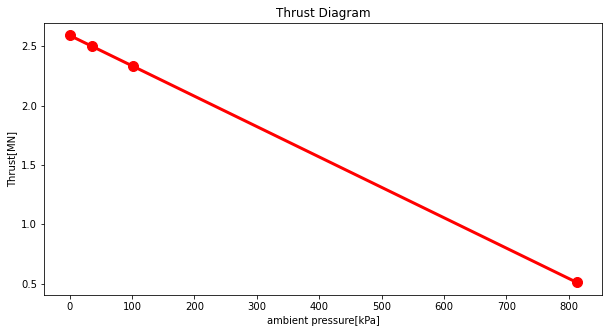

In [13]:
fig = plt.figure(figsize=(10, 5))
plt.plot(P_a, T, marker="o", linestyle = "solid", markersize=10, color="red", linewidth=3)
plt.title('Thrust Diagram')
plt.xlabel('ambient pressure[kPa]')
plt.ylabel('Thrust[MN]')

# Isp Diagram

In [14]:
Isp = np.array([219.75, 219.75, 219.75, 45.71])

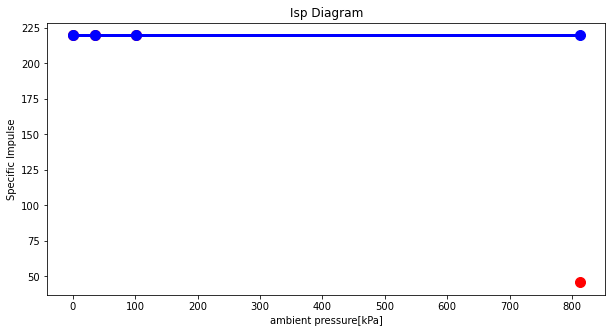

In [15]:
fig = plt.figure(figsize=(10, 5))
plt.plot(P_a, Isp, marker="o", linestyle = "", markersize=10, color="red", linewidth=3)
plt.title('Isp Diagram')
plt.xlabel('ambient pressure[kPa]')
plt.ylabel('Specific Impulse')

Isp2 = np.array([219.75, 219.75, 219.75, 219.75])
plt.plot(P_a, Isp2, marker="o", linestyle = "solid", markersize=10, color="blue", linewidth=3)